# Churn Bank Costumer Prediction

Nesste notebook será feita todos os testes e o treinamento do modelo de machine learning que será utilizado para a previsão de churn, essa inferencia é importante para saber o que será esperado de acordo com as amostras atuais, além da possibilidade de uma verificação em tempo real de perfil do usuario.

trazendo todos as variaveis e bibliotecas já resolvidas para construção do modelo

In [1]:
from sklearn.model_selection import train_test_split
import pickle
import sys
sys.path.append('../')
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'
from utils.model_utils import *

## 4. Testando Modelos

In [2]:
df_encoder_norm = pd.read_csv("data\Costumer-Churn-Clean.csv")

In [3]:
X = df_encoder_norm.drop(["Exited", "Unnamed: 0", "Gender"], axis=1)
y = df_encoder_norm['Exited']

Separação Treino e Teste.

- Na etapa de separação treino-teste, dividimos o conjunto de dados em dois subconjuntos distintos: um para treinar o modelo e outro para testar sua capacidade de generalização. O conjunto de treinamento é usado para ajustar os parâmetros do modelo, enquanto o conjunto de teste é usado para avaliar o desempenho do modelo em dados não vistos durante o treinamento. Essa separação é crucial para evitar o overfitting, ou seja, o ajuste excessivo do modelo aos dados de treinamento, garantindo que o modelo consiga generalizar bem para novos dados.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
X_train = X_train.rename(columns=lambda x: x.replace(' ', '_'))
X_test = X_test.rename(columns=lambda x: x.replace(' ', '_'))

In [6]:
X_train

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction_Score,Card_Type,Point_Earned
10918,0.780,0.0,0.486486,0.2,0.534899,0.666667,1.0,0.0,0.140257,1.0,0.50,0.333333,0.669694
2339,0.602,0.5,0.108108,0.5,0.586044,0.000000,0.0,0.0,0.708826,0.0,1.00,1.000000,0.587968
12852,0.838,1.0,0.378378,0.6,0.687998,0.000000,0.0,1.0,0.802843,1.0,0.25,0.333333,0.886493
125,0.164,0.0,0.324324,0.9,0.608229,0.000000,1.0,0.0,0.551321,1.0,0.50,0.000000,0.360953
15082,0.904,0.5,0.621622,0.9,0.278971,0.000000,1.0,0.0,0.481101,1.0,0.25,0.666667,0.837684
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.722,0.5,0.297297,0.4,0.432564,0.000000,1.0,0.0,0.837282,1.0,0.50,0.000000,0.624291
3264,0.776,0.0,0.229730,0.5,0.642787,0.333333,1.0,0.0,0.907178,0.0,1.00,1.000000,0.507378
9845,0.480,1.0,0.270270,0.9,0.000000,0.333333,1.0,1.0,0.743764,0.0,0.50,1.000000,0.517594
10799,0.644,0.0,0.445946,0.4,0.000000,0.000000,0.0,0.0,0.721018,1.0,0.00,0.666667,0.441544


In [7]:
valid_clf_models(X_train, X_test, y_train, y_test)

SVC(probability=True)
 
F1 Score train: 0.997
Accuracy train: 0.997
Recall train: 0.996
Precision train: 0.998
Log loss train: 0.102
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
F1 Score test: 0.997
Accuracy test: 0.997
Recall test: 0.994
Precision test: 1.000
Log loss test: 0.113
--------------------------------------------------
LogisticRegression()
 
F1 Score train: 0.997
Accuracy train: 0.997
Recall train: 0.996
Precision train: 0.998
Log loss train: 0.102
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
F1 Score test: 0.997
Accuracy test: 0.997
Recall test: 0.994
Precision test: 1.000
Log loss test: 0.113
--------------------------------------------------
RandomForestClassifier()
 
F1 Score train: 1.000
Accuracy train: 1.000
Recall train: 1.000
Precision train: 1.000
Log loss train: 0.000
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
F1 Score test: 0.998
Accuracy test: 0.998
Recall test: 0.997
Precision test: 1.000
Log loss test: 0.057
--

[LightGBM] [Info] Number of positive: 6370, number of negative: 6369
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 12739, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500039 -> initscore=0.000157
[LightGBM] [Info] Start training from score 0.000157


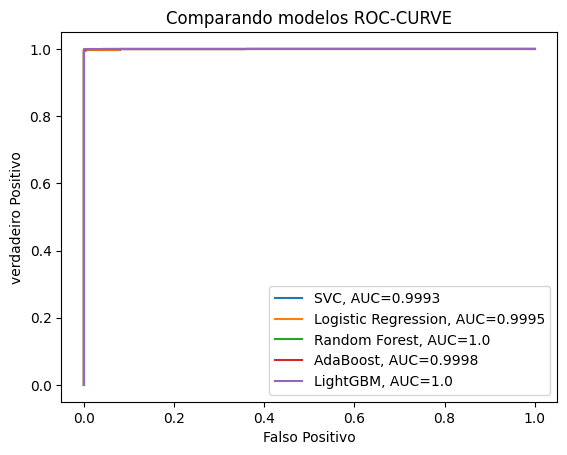

In [8]:
plot_valid_clf_models(X_train, X_test, y_train, y_test)

In [9]:
# parameter_model_select(X_train, y_train)

In [10]:
clf = LGBMClassifier(force_col_wise=True)

In [11]:
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 6370, number of negative: 6369
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 12739, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500039 -> initscore=0.000157
[LightGBM] [Info] Start training from score 0.000157


LGBMClassifier(force_col_wise=True)

In [12]:
predict = clf.predict(X_test)

--------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1593
         1.0       1.00      1.00      1.00      1592

    accuracy                           1.00      3185
   macro avg       1.00      1.00      1.00      3185
weighted avg       1.00      1.00      1.00      3185

--------------------------------------------------
F1 Score test: 0.999


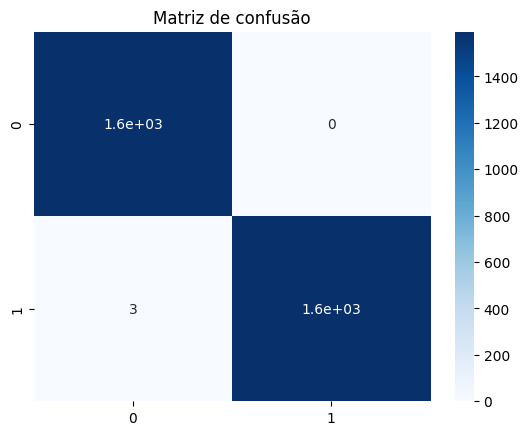

In [13]:
evaluate(y_test, predictions=predict)

## 5. Exportando o modelo

In [14]:
churn_detection_clf = LGBMClassifier(force_col_wise=True)

In [15]:
churn_detection_clf.fit(X, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7962, number of negative: 7962
[LightGBM] [Info] Total Bins 1118
[LightGBM] [Info] Number of data points in the train set: 15924, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(force_col_wise=True)

In [16]:
with open('model/churn_detection_clf.sav', 'wb') as m:
    pickle.dump(churn_detection_clf, m)
with open('model/churn_detection_clf.pkl', 'wb') as m:
    pickle.dump(churn_detection_clf, m)